## School System Finances

In [52]:
# removes the need to call plt.show() every time
%matplotlib inline 
import missingno as msno
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('school_data.csv')

/Users/SophiaLi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1.500100e+12,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1.500200e+12,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1.500300e+12,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1.500300e+12,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1.500400e+12,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [4]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

In [74]:
clean_df = df[['NAME', 'IDCENSUS', 'CSA', 'SCHLEV', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV', 'TCURINST', 'TCURSSVC']]

In [29]:
#clean_df.columns = ['ID_Census', "Name", 'ANSI_Code', 'Consolidated Statistical Area1']

In [75]:
clean_df.head()

,NAME,IDCENSUS,CSA,SCHLEV,TOTALREV,TFEDREV,TSTREV,TLOCREV,TCURINST,TCURSSVC
0,AUTAUGA COUNTY SCHOOL DISTRICT,1.500100e+12,N,3,79665,7574,53244,18847,44085,23217
1,BALDWIN COUNTY SCHOOL DISTRICT,1.500200e+12,380,3,330317,23602,143282,163433,155668,99682
2,BARBOUR COUNTY SCHOOL DISTRICT,1.500300e+12,N,3,10519,2518,5632,2369,5249,3835
3,EUFAULA CITY SCHOOL DISTRICT,1.500300e+12,N,3,26076,3374,16048,6654,14887,7494
4,BIBB COUNTY SCHOOL DISTRICT,1.500400e+12,142,3,31825,3586,21687,6552,16019,10822


In [76]:
clean_df.shape

(14376, 10)

In [77]:
clean_df['SCHLEV'].describe()

count    14376.000000
mean         2.883139
std          1.271649
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: SCHLEV, dtype: float64

Does the amount of revenue affect the amount of services the school provides?

Is there a difference in schools that receive local vs federal funding?

In [78]:
sum(clean_df['SCHLEV'] == 3)

10478

In [79]:
sum(clean_df['SCHLEV'] == 2)

423

In [80]:
sum(clean_df['SCHLEV'] == 1)

2435

In [81]:
clean_df.SCHLEV.unique()

array([3, 1, 5, 2, 6, 7])

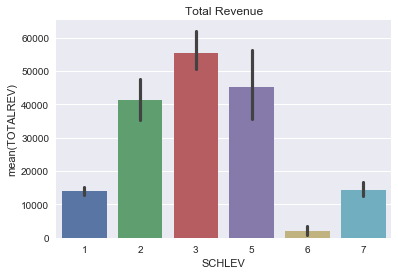

In [114]:
TR = sns.barplot(clean_df.SCHLEV, clean_df.TOTALREV).set_title('Total Revenue')

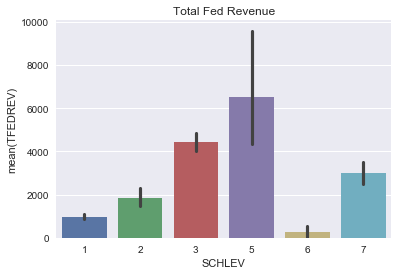

In [115]:
FED = sns.barplot(clean_df.SCHLEV, clean_df.TFEDREV).set_title('Total Fed Revenue')

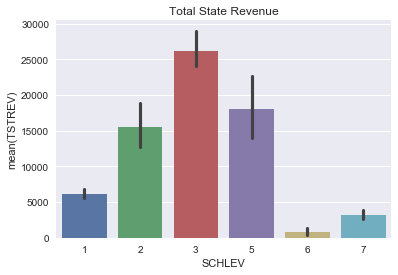

In [116]:
sns.barplot(clean_df.SCHLEV, clean_df.TSTREV).set_title('Total State Revenue')

In [85]:
#fig, axs = plt.subplots(1,2)
#fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
#fed = sns.barplot(clean_df.SCHLEV, clean_df.TFEDREV)
#state = sns.barplot(clean_df.SCHLEV, clean_df.TSTREV)

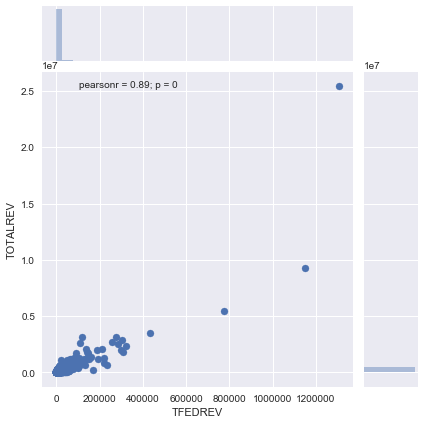

In [86]:
sns.jointplot(clean_df.TFEDREV, clean_df.TOTALREV)

In [87]:
plt.figure(1) #look at scatter plots
plt.scatter(points,wage)
plt.title("Wage vs. Points")
plt.xlabel("Points")
plt.ylabel("Wage")
plt.show()
plt.close()

plt.figure(2)
plt.scatter(exper,wage)
plt.title("Wage vs. Experience")
plt.xlabel("Experience")
plt.ylabel("Wage")

plt.show()

NameError: name 'points' is not defined

In [105]:
clean_df.CSA.unique()

array(['N', '380', '142', '194', '222', '174', '290', '536', '332', '340',
       '308', '368', '284', '488', '472', '260', '546', '348', '382',
       '454', '216', '233', '444', '525', '408', '278', '148', '428',
       '548', '264', '300', '370', '412', '162', '422', '533', '122',
       '356', '496', '470', '147', '292', '518', '446', '448', '164',
       '476', '466', '176', '522', '145', '426', '209', '221', '424',
       '258', '294', '320', '350', '178', '515', '458', '316', '144',
       '168', '218', '420', '512', '312', '556', '358', '150', '336',
       '170', '362', '406', '318', '217', '384', '438', '521', '266',
       '474', '310', '330', '220', '394', '378', '359', '244', '462',
       '185', '298', '190', '520', '309', '339', '456', '106', '188',
       '238', '160', '464', '532', '104', '236', '296', '268', '280',
       '274', '396', '120', '172', '545', '404', '450', '246', '468',
       '338', '360', '184', '212', '566', '198', '534', '248', '430',
       '425', '

In [98]:
new = clean_df.groupby('CSA')
new

In [110]:
clean_df[clean_df['TOTALREV'].map(len) > .5]

TypeError: object of type 'int' has no len()